# Standard Normal N(0,1)

Generate a total of 2000 i.i.d. standard normals N(0,1) using each method. Test the normality of the standard normals obtained from each method, using the Anderson-Darling test. Which data set is closer to the normal distribution? (Consult the paper by Stephens - filename 2008 Stephens.pdf on Canvas - to find the appropriate critical points for the Anderson-Darling statistic. Clearly identify those percentiles in your soultion.)

In [1]:
# imports
import random
import math
import numpy
import matplotlib.pyplot as plt
from scipy.stats import anderson
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

# project imports
import rand
import halton
import bfs
import box_muller
import beasley_springer_moro

### Generate a total of 2000 i.i.d. standard normals N (0, 1) using Box Muller

In [2]:
# generate 1000 2-dim vectors, then flatten to create 2000 standard normals
N = 1000
s = 2
seq = rand.rand_seq
seq = halton.halton_seq
#seq = bfs.bfs_seq

In [3]:
l = box_muller.box_muller_seq(s, N, seq=seq)
# print the first 20
print(l[:10])
# flatten the sequence into 1 dimension
flattened = [item for sublist in l for item in sublist]
nums = flattened
print(nums[:20])

[(0.7443300850272079, -0.6113446172758047), (0.22750250323107185, 1.3746076837154961), (-0.2494802853218258, -0.44280186764434915), (1.6558473350849008, 0.01741370677972137), (-0.3827115346426496, 0.647064691400064), (0.21543958611815975, -1.1509103496429351), (2.532576610273044, 2.170874557206201), (-1.7154082878285117, 0.6040055310970016), (-0.712862863490848, -0.4796718958687281), (1.1489490697564084, -0.5619728901777015)]
[0.7443300850272079, -0.6113446172758047, 0.22750250323107185, 1.3746076837154961, -0.2494802853218258, -0.44280186764434915, 1.6558473350849008, 0.01741370677972137, -0.3827115346426496, 0.647064691400064, 0.21543958611815975, -1.1509103496429351, 2.532576610273044, 2.170874557206201, -1.7154082878285117, 0.6040055310970016, -0.712862863490848, -0.4796718958687281, 1.1489490697564084, -0.5619728901777015]


### Sort the sequence

In [4]:
nums = numpy.array(nums)
nums = sorted(nums)

In [5]:
print(nums[:20])

[-3.5409431816696766, -3.1398610496653436, -2.9805243083534694, -2.9368656765203136, -2.9183735528681174, -2.749374931759913, -2.696584045082842, -2.673434038789564, -2.6637133132283606, -2.602326318987692, -2.590178545528447, -2.5814016358470764, -2.515685310747461, -2.453941617556857, -2.452827867160038, -2.4113719915033367, -2.3938365329485434, -2.3420632093356692, -2.3329943092852723, -2.276147668551989]


### Compute the sample mean and standard deviation

In [6]:
nums = numpy.array(nums)
mean = numpy.mean(nums)
var = numpy.var(nums)
std = numpy.std(nums)

print('mean = {}'.format(mean))
print('variance = {}'.format(var))
print('standard deviation = {}'.format(std))

mean = 0.0014995686420993478
variance = 0.9935254197054167
standard deviation = 0.996757452796525


<IPython.core.display.Javascript object>


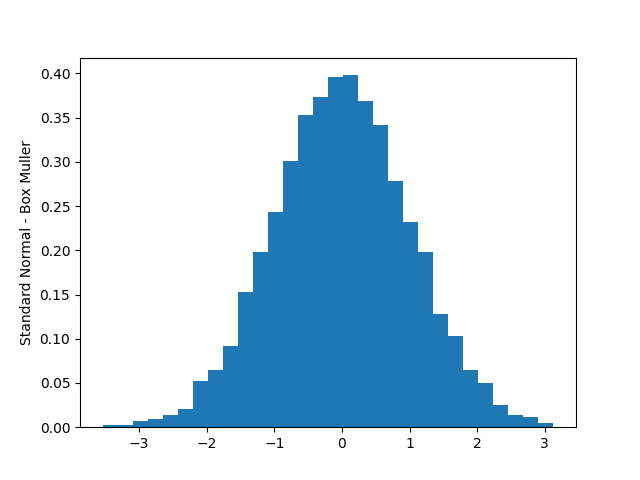

In [7]:
# plot the histogram
plt.hist(nums, density=True, bins=30)
plt.ylabel('Standard Normal - Box Muller');

### Anderson Darling Test

reference:
https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test#Test_for_normality

reference:
2008 Stephens.pdf pg. 4, "1.3 Modificatons for a test for normality, u, and sigma^2 unknown"

In [8]:
# normality test using scipy.stats
result = anderson(nums)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.041
15.000: 0.575, data looks normal (fail to reject H0)
10.000: 0.655, data looks normal (fail to reject H0)
5.000: 0.785, data looks normal (fail to reject H0)
2.500: 0.916, data looks normal (fail to reject H0)
1.000: 1.090, data looks normal (fail to reject H0)


### Generate a total of 2000 i.i.d. standard normals N (0, 1) using Beasley-Springer-Moro

In [9]:
N=2000
s=1

l = beasley_springer_moro.beasley_springer_moro_seq(s=s, N=N, seq=seq)
# print the first 20
print(l[:20])
# flatten the sequence into 1 dimension
flattened = [item for sublist in l for item in sublist]
nums = flattened
print(nums[:20])

[(-0.45354220491354497,), (-1.4389723392670315,), (0.18932048542646718,), (1.6456218388230586,), (-0.1254613002624064,), (-0.841338444465769,), (0.5246282553188133,), (1.2137540974782643,), (-0.2856341307724526,), (-1.0912603031903014,), (0.35199549745081987,), (-2.238962442870265,), (0.031536554447300705,), (-0.6354141211428904,), (0.714623629180169,), (1.0639714340786743,), (-0.3682881880881213,), (-1.2462888763124396,), (0.2697642345248874,), (2.0820090832222746,)]
[-0.45354220491354497, -1.4389723392670315, 0.18932048542646718, 1.6456218388230586, -0.1254613002624064, -0.841338444465769, 0.5246282553188133, 1.2137540974782643, -0.2856341307724526, -1.0912603031903014, 0.35199549745081987, -2.238962442870265, 0.031536554447300705, -0.6354141211428904, 0.714623629180169, 1.0639714340786743, -0.3682881880881213, -1.2462888763124396, 0.2697642345248874, 2.0820090832222746]


### Sort the sequence

In [10]:
nums = numpy.array(nums)
nums = sorted(nums)

In [11]:
print(nums[:20])

[-3.3727194621923373, -3.1346044221532785, -3.000267898341195, -2.90487610870623, -2.830292443600595, -2.7687540302075453, -2.7161964314970097, -2.6702165174341346, -2.6292716619518317, -2.5923108117998117, -2.5585846646267565, -2.5275396610714904, -2.498754904793903, -2.4719026739584775, -2.446722653047625, -2.42300452486657, -2.4005758596607176, -2.3792934740686174, -2.3590371290895824, -2.339704844677499]


### Compute the sample mean and standard deviation

In [12]:
nums = numpy.array(nums)
mean = numpy.mean(nums)
var = numpy.var(nums)
std = numpy.std(nums)

print('mean = {}'.format(mean))
print('variance = {}'.format(var))
print('standard deviation = {}'.format(std))

mean = 0.00017262607399879925
variance = 0.9995629114486932
standard deviation = 0.999781431838326


<IPython.core.display.Javascript object>


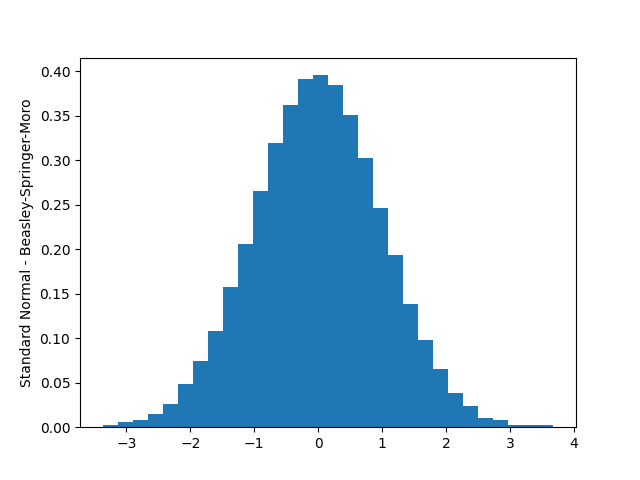

In [13]:
# plot the histogram
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(nums, density=True, bins=30)
ax.set_ylabel('Standard Normal - Beasley-Springer-Moro');

In [14]:
# normality test using scipy.stats
result = anderson(nums)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.002
15.000: 0.575, data looks normal (fail to reject H0)
10.000: 0.655, data looks normal (fail to reject H0)
5.000: 0.785, data looks normal (fail to reject H0)
2.500: 0.916, data looks normal (fail to reject H0)
1.000: 1.090, data looks normal (fail to reject H0)
